In [1]:
import tensorflow as tf
from tensorflow.keras.layers import (Dense, 
                                     BatchNormalization, 
                                     LeakyReLU, 
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten, 
                                     Input
                                     )
import matplotlib.pyplot as plt

In [ ]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data() 

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 

BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


11490434/11490434 [==============================] - 2s 0us/step


In [3]:
def generative_model():
  model = tf.keras.Sequential() 
  model.add(Input((100, )))
  model.add(Dense(7*7*128, use_bias=False))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Reshape((7,7,128)))
  model.add(Conv2DTranspose(64, (5,5), strides=(1, 1), padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Conv2DTranspose(32, (5,5), (2, 2), padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Conv2DTranspose(1, (3,3), (2,2), padding='same'))

  return model

In [4]:
generator = generative_model() 
print(generator.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              627200    
                                                                 
 batch_normalization (BatchN  (None, 6272)             25088     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 64)         204864    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 64)         2

In [5]:
noise = tf.random.normal([1, 100])
# noise = tf.reshape(noise, (100, ))
print(noise.shape)
img = generator(noise, training=False)

print(img.shape)

(1, 100)
(1, 28, 28, 1)


In [6]:
def discriminator_model():
  model = tf.keras.Sequential()
  model.add(Input((28,28,1)))
  model.add(Conv2D(256, (5,5),(2,2), padding='same'))
  model.add(Dropout(0.25))
  model.add(LeakyReLU())
  model.add(Conv2D(128, (5,5), padding='same'))
  model.add(Dropout(0.25))
  model.add(LeakyReLU())
  model.add(Conv2D(32, (5,5), (2,2), padding='same'))
  model.add(LeakyReLU())
  model.add(Conv2D(16, (5,5), (2,2), padding='same'))
  model.add(LeakyReLU())
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(1))

  return model 

In [7]:
discriminator = discriminator_model() 
print(discriminator.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 256)       6656      
                                                                 
 dropout (Dropout)           (None, 14, 14, 256)       0         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       819328    
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)         

In [ ]:
decision = discriminator(img)
print(decision)

tf.Tensor([[0.00055262]], shape=(1, 1), dtype=float32)


In [8]:
### Custom optimizers based off Binary_Cross_Entropy_Loss 
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def dicriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

  return real_loss+fake_loss

def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

  
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [9]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [10]:
from tensorflow.python import training
from tensorflow.python.eager.backprop import GradientTape

@tf.function
def training_step(images):
  BATCH_SIZE = 16
  noise = tf.random.normal([BATCH_SIZE, 100])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    
    generator_output = generator(noise, training=True)

    real_images_output = discriminator(images, training=True)
    fake_images_output = discriminator(generator_output, training=True)

    disc_loss = dicriminator_loss(real_images_output, fake_images_output)
    gen_loss = generator_loss(fake_images_output)
  
  discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)

  ## gradient-update-step 

  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))
  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))






In [11]:
def train(dataset, epochs):
  for epoch in range(epochs):
    print(epoch)
    for batch in dataset:
      training_step(batch)

In [19]:
train(train_dataset, 25)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


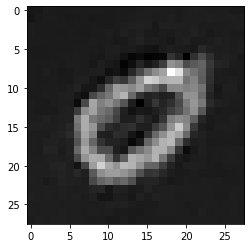

In [34]:
noise = tf.random.normal([1, 100])
random_image = generator(noise, training=False)

plt.imshow(random_image[0, :, :, 0], cmap='gray')

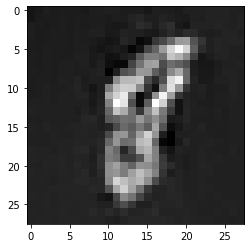

In [35]:
noise = tf.random.normal([1, 100])
random_image = generator(noise, training=False)

plt.imshow(random_image[0, :, :, 0], cmap='gray')

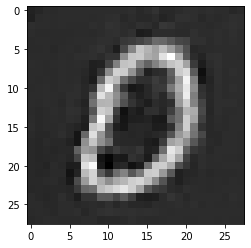

In [36]:
noise = tf.random.normal([1, 100])
random_image = generator(noise, training=False)

plt.imshow(random_image[0, :, :, 0], cmap='gray')

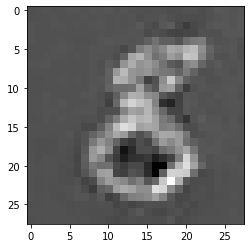

In [37]:
noise = tf.random.normal([1, 100])
random_image = generator(noise, training=False)

plt.imshow(random_image[0, :, :, 0], cmap='gray')